In [2]:
%pip install tensorflow
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
# Define the neural network architecture
class ThreeLayerNetwork(tf.Module):
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = tf.Variable(tf.random.normal([input_size, hidden_size]))
        self.b1 = tf.Variable(tf.zeros([hidden_size]))
        self.W2 = tf.Variable(tf.random.normal([hidden_size, hidden_size]))
        self.b2 = tf.Variable(tf.zeros([hidden_size]))
        self.W3 = tf.Variable(tf.random.normal([hidden_size, output_size]))
        self.b3 = tf.Variable(tf.zeros([output_size]))

    def __call__(self, x):
        # Layer 1
        z1 = tf.einsum('ij,jk->ik', x, self.W1) + self.b1
        a1 = tf.nn.relu(z1)

        # Layer 2
        z2 = tf.einsum('ij,jk->ik', a1, self.W2) + self.b2
        a2 = tf.nn.relu(z2)

        # Layer 3
        z3 = tf.einsum('ij,jk->ik', a2, self.W3) + self.b3
        output = tf.nn.sigmoid(z3)

        return output

# Generating synthetic data
def generate_data(n_samples):
    x = np.random.rand(n_samples, 3) * 10
    y = np.sin(x[:, 0]) + np.cos(x[:, 1]) ** 2 + np.log(x[:, 2] + 1)
    y = y[:, np.newaxis]
    return x, y



# Training loop
def train(model, x, y, loss_fn, optimizer, epochs=100):
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            predictions = model(x)
            loss = loss_fn(y, predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Loss: {loss.numpy()}')

In [6]:
# Create dataset
n_samples = 1000
x_train, y_train = generate_data(n_samples)

# Model instantiation
input_size = 3
hidden_size = 10
output_size = 1
model = ThreeLayerNetwork(input_size, hidden_size, output_size)

# Loss and optimizer
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.optimizers.Adam(learning_rate=0.001)

In [7]:
# Train the model
train(model, x_train, y_train, loss_fn, optimizer)


Epoch 0: Loss: 3.330101728439331
Epoch 10: Loss: 3.247739553451538
Epoch 20: Loss: 3.1631195545196533
Epoch 30: Loss: 3.0374903678894043
Epoch 40: Loss: 2.8401308059692383
Epoch 50: Loss: 2.800936460494995
Epoch 60: Loss: 2.791682720184326
Epoch 70: Loss: 2.788984537124634
Epoch 80: Loss: 2.7879347801208496
Epoch 90: Loss: 2.7874364852905273


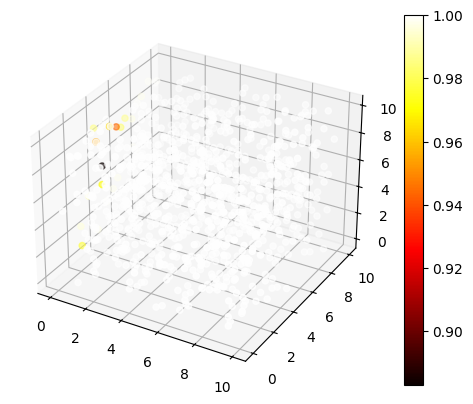

In [8]:
# 4D Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = x_train[:,0], x_train[:,1], x_train[:,2]
c = model(x_train)
img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
plt.colorbar(img)
plt.show()